In [ ]:
import numpy as np
import random
import tensorflow as tf
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)


Data reproducibility is important so that the same predictions are made everytime. Seed ensures that every time random is called, the order of values called by random stays the same.

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
!pip install kaggle

In [ ]:
kaggle_dict=json.load(open("kaggle.json"))

Kaggle dictionary consists of key value pairs in the format dict[username]:key

The os.environ command in Python is used to interact with the environment variables of the operating system. Environment variables are key-value pairs that can affect the way running processes will behave on a computer.

In [ ]:
os.environ['KAGGLE_USERNAME']=kaggle_dict['username']
os.environ['KAGGLE_KEY']=kaggle_dict['key']

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [01:03<00:00, 37.8MB/s]
100% 2.04G/2.04G [01:03<00:00, 34.7MB/s]


ls lists all the files in local directory to make sure dataset is present

In [ ]:
!ls

drive  kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
with ZipFile("plantvillage-dataset.zip","r") as zip:
  zip.extractall()

In [ ]:
colored_set='plantvillage dataset/color'

In [ ]:
img_size=210
batch_size=64

In [ ]:
gen=ImageDataGenerator(rescale=1./255,
                           validation_split=0.2)

In [ ]:
train=gen.flow_from_directory(
    colored_set,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)


Found 43456 images belonging to 38 classes.


In [ ]:
validation=gen.flow_from_directory(
    colored_set,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [ ]:
model=models.Sequential() # we use sequential when out layers are stacked one upon another in a linear way where each layer gets tensor as I/P as weel as O/P
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten()) #flattens multi-D data into 1D
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(train.num_classes,activation='softmax'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 208, 208, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 104, 104, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 102, 102, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 51, 51, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 166464)            0         
                                                                 
 dense (Dense)               (None, 256)               4

softmax: This specifies the activation function for the output layer. The softmax activation function is used for multi-class classification problems. It converts the logits (raw prediction scores) into probabilities that sum up to 1, making it suitable for classification.

relu: This specifies the activation function used in this layer. The ReLU (Rectified Linear Unit) activation function introduces non-linearity to the model, allowing it to learn more complex patterns.



In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

adam: The optimizer determines how the model's weights are updated based on the gradient descent algorithm. 'adam' is one of the most commonly used optimizers in deep learning. It adjusts the learning rate throughout training, making it an adaptive optimizer suitable for a wide range of problems.

loss: The loss function measures how well the model performs during training and is used to minimize the error between the predicted outputs and the actual outputs (labels). 'categorical_crossentropy' is typically used for multi-class classification problems where each example belongs to one of several classes. It calculates the cross-entropy loss between the predicted probability distribution and the true distribution of the target classes.

For binary classification, 'binary_crossentropy' is commonly used. For regression tasks, mean squared error ('mse') or mean absolute error ('mae') are often used.


accuracy: Metrics are used to monitor the training and evaluation process. 'accuracy' is a widely used metric for classification tasks that calculates the proportion of correct predictions to the total number of predictions made. During training, it provides an easy-to-understand indication of how well the model is performing.

Other metrics like 'precision', 'recall', and 'f1-score' can also be used depending on the specific requirements of the problem.

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
callback=EarlyStopping(monitor='accuracy', verbose=1, patience=1, baseline=None, mode='auto')

In [ ]:
history=model.fit(train, steps_per_epoch=train.samples//batch_size, epochs=10, validation_data=validation, validation_steps=validation.samples//batch_size, callbacks=callback)

Epoch 1/10
679/679 [==============================] - 155s 218ms/step - loss: 1.2570 - accuracy: 0.6774 - val_loss: 0.5651 - val_accuracy: 0.8273
Epoch 2/10
679/679 [==============================] - 148s 218ms/step - loss: 0.3760 - accuracy: 0.8831 - val_loss: 0.4424 - val_accuracy: 0.8636
Epoch 3/10
679/679 [==============================] - 148s 217ms/step - loss: 0.1642 - accuracy: 0.9479 - val_loss: 0.4608 - val_accuracy: 0.8609
Epoch 4/10
679/679 [==============================] - 123s 181ms/step - loss: 0.0941 - accuracy: 0.9694 - val_loss: 0.5445 - val_accuracy: 0.8699
Epoch 5/10
679/679 [==============================] - 130s 191ms/step - loss: 0.0752 - accuracy: 0.9751 - val_loss: 0.4630 - val_accuracy: 0.8895
Epoch 6/10
679/679 [==============================] - 128s 188ms/step - loss: 0.0445 - accuracy: 0.9858 - val_loss: 0.6063 - val_accuracy: 0.8685
Epoch 7/10
679/679 [==============================] - 145s 213ms/step - loss: 0.0499 - accuracy: 0.9843 - val_loss: 0.5910 -

In [ ]:
val_loss, val_accuracy= model.evaluate(validation,steps=validation.samples//batch_size)
print(f"Validation Accuracy:{val_accuracy*100:.2f}%")

169/169 [==============================] - 24s 139ms/step - loss: 0.5910 - accuracy: 0.8791
Validation Accuracy:87.91%


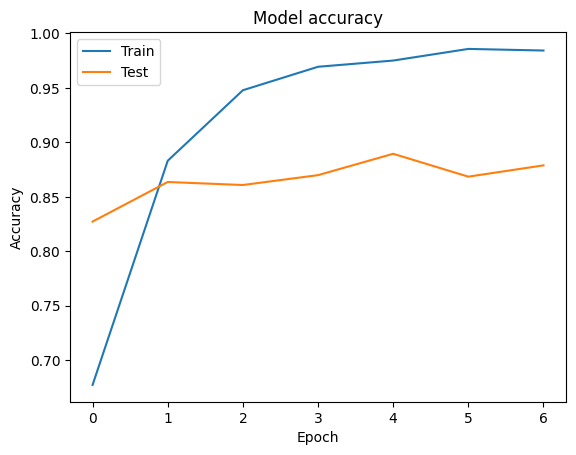

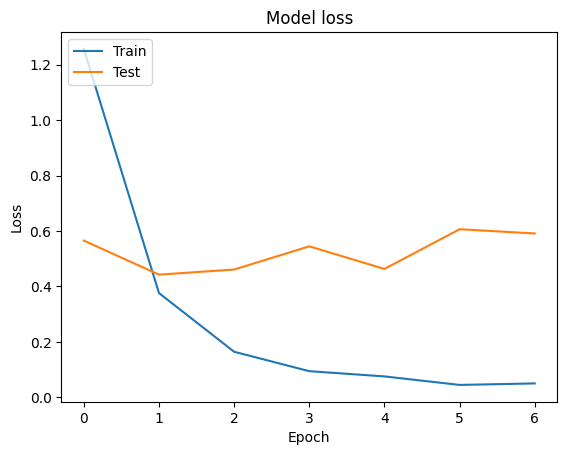

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
def loadandprepimage(image_path,target_size=(210,210)):
  img=Image.open(image_path)
  img=img.resize(target_size)
  img_arr=np.array(img)
  img_arr=np.expand_dims(img_arr,axis=0)
  img_arr=img_arr/255.0
  return img_arr

def predictimage(model, image_path, class_indices):
  preprocessed_img=loadandprepimage(image_path)
  prediction=model.predict(preprocessed_img)
  predicted_class=np.argmax(prediction, axis=1)[0]
  predicted_class_name=class_indices[predicted_class]
  return predicted_class_name

In [ ]:
class_indices={v: k for k, v in train.class_indices.items()}

In [ ]:
json.dump(class_indices,open("class_indices.json","w"))

In [ ]:
import pickle
filename='plant_disease.pkl'
pickle.dump(model,open(filename,'wb'))